In [1]:
import pymysql.cursors
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as mticker

# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='root',
                             db='tv4e',
                             charset='latin1',
                             cursorclass=pymysql.cursors.DictCursor)
connection

In [14]:
query = "SELECT * FROM majordomo_rating"
df_ratings = pd.read_sql(query, connection)

df_ratings.set_index('id', inplace=True)
df_ratings = df_ratings[df_ratings.watched_type != 'forced']

df_ratings.head()

,watch_time,date_creation,watched_type,rating_implicit,rating_explicit,overall_rating_value,user_id,video_id
id,,,,,,,,
19701,100,2018-01-20 22:07:39,injected,1.0,1.0,1.0,4,5363
19702,100,2018-01-20 13:44:41,injected,1.0,NaN,0.5,4,5385
19703,100,2018-01-20 21:37:39,injected,1.0,NaN,0.5,4,5393
19704,100,2018-01-20 17:44:46,injected,1.0,NaN,0.5,4,5423
19705,100,2018-01-20 15:14:35,injected,1.0,0.0,0.3,4,5427


In [18]:
df_ratings.describe()

,watch_time,rating_implicit,rating_explicit,overall_rating_value,user_id,video_id
count,388.000000,388.000000,195.000000,388.000000,388.000000,388.000000
mean,94.432990,0.944330,0.179487,0.425062,22.559278,5668.443299
std,20.028743,0.200287,0.521289,0.332079,12.820530,237.861433
min,1.000000,0.010000,-1.000000,-1.000000,4.000000,5362.000000
25%,100.000000,1.000000,0.000000,0.300000,9.000000,5447.000000
50%,100.000000,1.000000,0.000000,0.500000,24.000000,5648.500000
75%,100.000000,1.000000,0.000000,0.500000,36.000000,5831.000000
max,100.000000,1.000000,1.000000,1.000000,42.000000,6332.000000


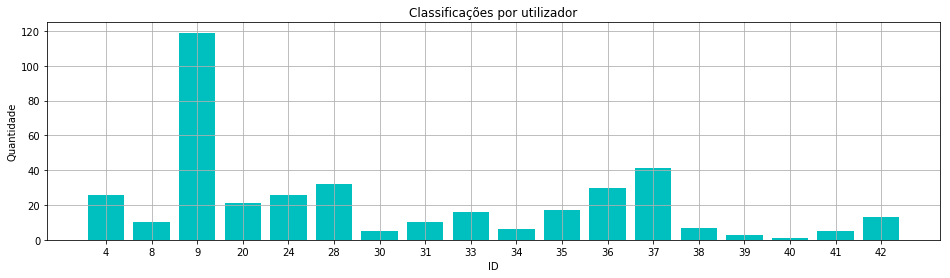

Média de vídeos vistos por utilizador: 22


In [15]:
# Grouping ratings by user
df_ratings_by_user = df_ratings.groupby(['user_id']).size().reset_index(name='counts')
id = df_ratings_by_user.user_id.unique().astype(str)

plt.clf()
fig = plt.figure(figsize=(16,4))

plt.title('Classificações por utilizador')
plt.bar(range(len(id)), df_ratings_by_user.counts, color='c', width=0.8)
plt.ylabel('Quantidade')
plt.xlabel('ID')

plt.xticks(range(len(id)),id)

plt.grid(True)
plt.show()

number_of_ratings = df_ratings.shape[0]
number_of_users = len(id)
print("Média de vídeos vistos por utilizador: {0:.0f}".format(number_of_ratings/number_of_users))

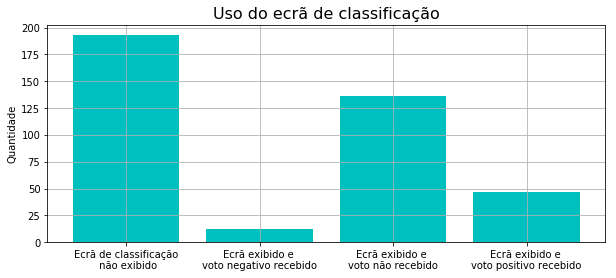

In [16]:
# Checking ratings distribution
df_ratings_distribution = df_ratings.fillna(-2) # using -2 to represent the scenario where no rating screen was shown
df_ratings_distribution = df_ratings_distribution.groupby(['rating_explicit']).size().reset_index(name='counts')


plt.clf()
fig = plt.figure(figsize=(10,4))
plt.title('Uso do ecrã de classificação', fontsize=16)
plt.bar(range(len(df_ratings_distribution.rating_explicit)), df_ratings_distribution.counts, color='c', width=0.8)
plt.ylabel('Quantidade')


labels = ['Ecrã de classificação\n não exibido',
          'Ecrã exibido e \nvoto negativo recebido', 
          'Ecrã exibido e \nvoto não recebido',
          'Ecrã exibido e \nvoto positivo recebido']

plt.xticks(range(len(df_ratings_distribution.rating_explicit)), labels)

plt.grid(True)
plt.show()

In [17]:
# Checking algoritmh precision

df_precision = df_ratings.dropna()
df_precision = df_precision[(df_precision['rating_explicit'] == 1) | (df_precision['rating_explicit'] == -1)]

positive_votes = df_precision[df_precision['rating_explicit'] == 1].shape[0]
all_votes = df_precision.shape[0]

precision = positive_votes/all_votes
print("Precisão do algoritmo: {0:.2f}%". format(precision*100))

Precisão do algoritmo: 79.66%


In [27]:
# Checking features correlations
# Use dummies of watched type to check corr between ratings and types
df_ratings.corr()

,watch_time,rating_implicit,rating_explicit,overall_rating_value,user_id,video_id
watch_time,1.000000,1.000000,0.094993,0.302441,0.021696,-0.001498
rating_implicit,1.000000,1.000000,0.094993,0.302441,0.021696,-0.001498
rating_explicit,0.094993,0.094993,1.000000,0.965575,-0.055715,-0.175439
overall_rating_value,0.302441,0.302441,0.965575,1.000000,-0.062202,-0.135923
user_id,0.021696,0.021696,-0.055715,-0.062202,1.000000,0.617635
video_id,-0.001498,-0.001498,-0.175439,-0.135923,0.617635,1.000000
